<a href="https://colab.research.google.com/github/ahussein0/A.H-Projects-1/blob/main/Predicting_Stock_Prices_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
[*********************100%***********************]  1 of 1 completed


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnxfoj99a/kdnh18cs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnxfoj99a/tof_2fz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22188', 'data', 'file=/tmp/tmpnxfoj99a/kdnh18cs.json', 'init=/tmp/tmpnxfoj99a/tof_2fz3.json', 'output', 'file=/tmp/tmpnxfoj99a/prophet_modelhbvwv9qe/prophet_model-20221105170637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:06:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


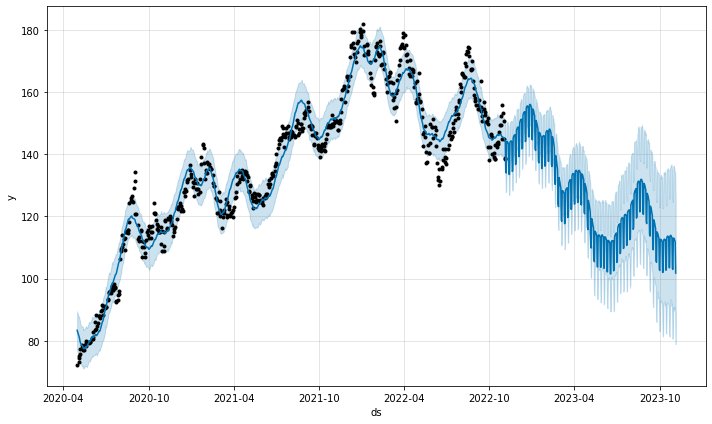

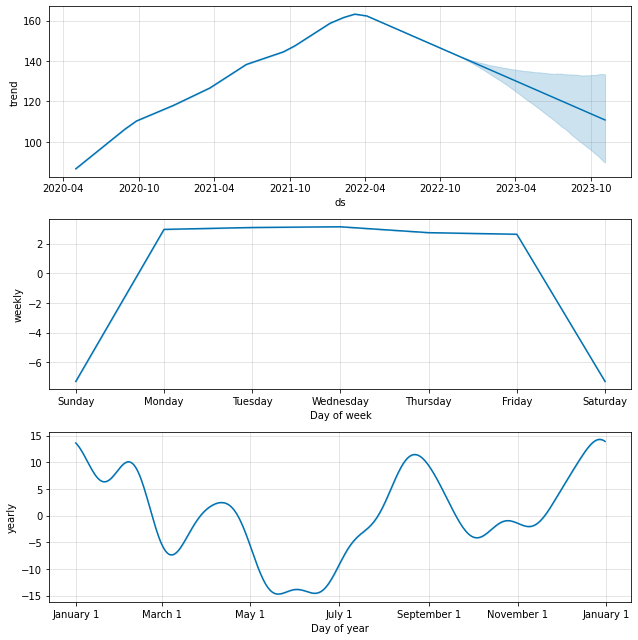

In [1]:
!pip install yfinance

from datetime import date
import yfinance as yf
from prophet import Prophet

# Get data
START = "2020-05-01"
TODAY = date.today().strftime("%Y-%m-%d")

# 'AAPL' , 'SPY' , 'TSLA'
selected_stock = 'AAPL'

data = yf.download(selected_stock, START, TODAY)
data.reset_index(inplace=True)

data.tail()

#Predict forecast with Prophet

df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)

# create future period to predict
n_years = 1
period = n_years * 365
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# plot forecast
figl = m.plot(forecast)

# plot weekly and yearly forecast
fig2 = m.plot_components(forecast)